# Big Data Mart Sales Problem

Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

In [102]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Bigdatamart_Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7090,FDP25,15.2,Low Fat,0.035497,Canned,216.7824,OUT010,1998,NaN,Tier 3,Grocery Store,436.7648
7362,NCN41,17.0,Low Fat,0.087388,Health and Hygiene,125.0730,OUT010,1998,NaN,Tier 3,Grocery Store,369.5190
1871,FDJ28,12.3,Low Fat,0.021861,Frozen Foods,193.3162,OUT046,1997,Small,Tier 1,Supermarket Type1,3078.6592
817,FDQ15,NaN,Regular,0.150342,Meat,83.1276,OUT027,1985,Medium,Tier 3,Supermarket Type3,1868.2348
3922,NCW53,NaN,Low Fat,0.030347,Health and Hygiene,192.5162,OUT027,1985,Medium,Tier 3,Supermarket Type3,3078.6592


In [6]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# Checking Null Values

In [7]:
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

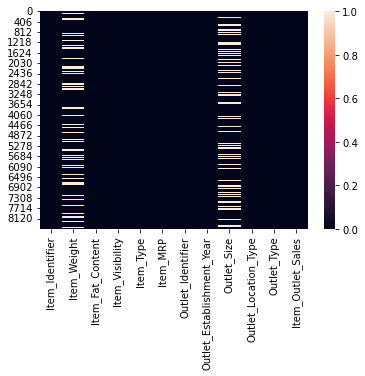

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

It shows Item_weight and Outlet_Size having null values.

We can fill continuous values with mean, and categorical values with mode.

In [10]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

We should fill Item_weight with mean of the column.

In [11]:
print(df['Outlet_Size'].mode())

0    Medium
Name: Outlet_Size, dtype: object


Here we are finding mode for the column Outlet_Size.

In [12]:
print(df['Outlet_Size'].mode()[0])

Medium


Here we are filling null values with mode values.

In [13]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

# Checking Null Values again

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

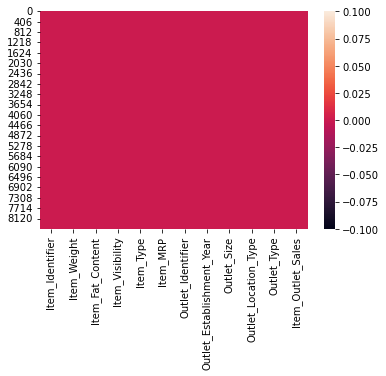

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.isnull().sum().sum()

0

# DataFrame Description

The dataset contains the data of Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales.

Item_Outlet_Sales is the target variable.

# Encoding

In [17]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Here we are having more columns with the categorical type of values. So we must do label encoding.

In [18]:
le=LabelEncoder()
df['Item_Identifier']=le.fit_transform(df['Item_Identifier'])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,1297,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,897,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,1357,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,681,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [19]:
le=LabelEncoder()
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.920,2,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.500,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.200,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,1297,8.930,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,897,8.380,2,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,1357,10.600,1,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,681,7.210,2,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [20]:
le=LabelEncoder()
df['Item_Type']=le.fit_transform(df['Item_Type'])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.500,1,0.016760,10,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,1297,8.930,1,0.000000,9,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [21]:
le=LabelEncoder()
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,Medium,Tier 3,Grocery Store,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [22]:
le=LabelEncoder()
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,Tier 1,Supermarket Type1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,Tier 3,Supermarket Type2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,Tier 1,Supermarket Type1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,Tier 3,Grocery Store,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,Tier 3,Supermarket Type1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,Tier 2,Supermarket Type1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,Tier 2,Supermarket Type1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,Tier 3,Supermarket Type2,1845.5976


In [23]:
le=LabelEncoder()
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,Supermarket Type1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,Supermarket Type2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,Supermarket Type1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,Grocery Store,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,Supermarket Type1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,Supermarket Type1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,Supermarket Type1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,Supermarket Type2,1845.5976


In [24]:
le=LabelEncoder()
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [25]:
df.shape

(8523, 12)

# Summary Statistics

In [26]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


In [27]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Identifier,8523.0,779.714889,449.222377,0.000,395.500000,783.000000,1167.000000,1558.000000
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Fat_Content,8523.0,1.369354,0.644810,0.000,1.000000,1.000000,2.000000,4.000000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_Type,8523.0,7.226681,4.209990,0.000,4.000000,6.000000,10.000000,15.000000
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Identifier,8523.0,4.722281,2.837201,0.000,2.000000,5.000000,7.000000,9.000000
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Outlet_Size,8523.0,1.170832,0.600327,0.000,1.000000,1.000000,2.000000,2.000000
Outlet_Location_Type,8523.0,1.112871,0.812757,0.000,0.000000,1.000000,2.000000,2.000000


# Plottings

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

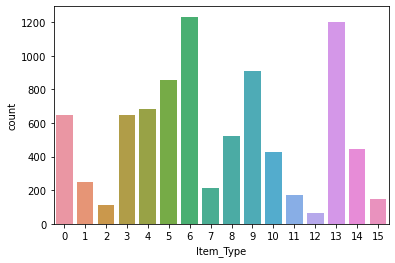

In [28]:
sns.countplot(df['Item_Type'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

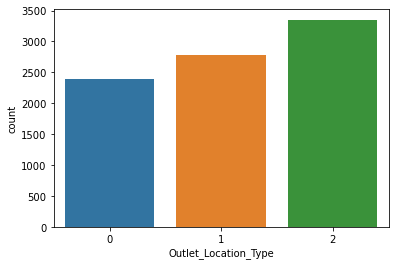

In [29]:
sns.countplot(df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

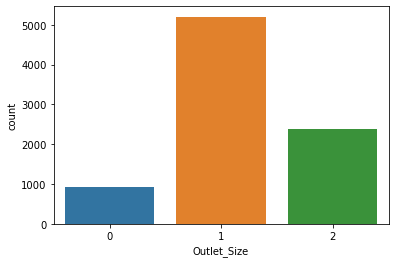

In [30]:
sns.countplot(df['Outlet_Size'])

It shows majority of outlet_size is 1.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

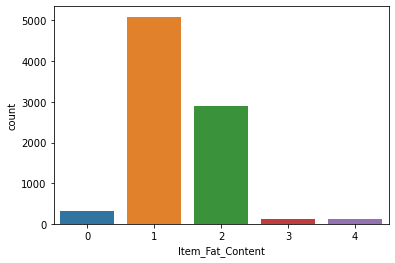

In [31]:
sns.countplot(df['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Identifier', ylabel='Count'>

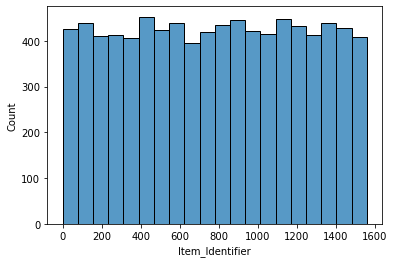

In [32]:
sns.histplot(df['Item_Identifier'], bins=20)

Item_Identifier ranges from 0 to nearly 1600

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

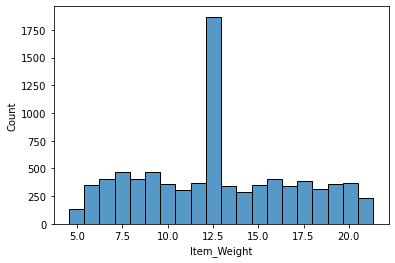

In [33]:
sns.histplot(df['Item_Weight'], bins=20)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Count'>

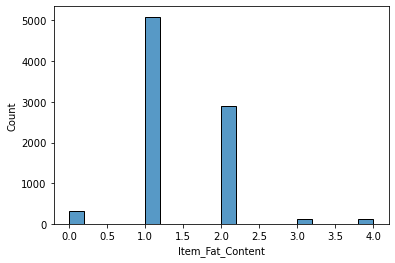

In [34]:
sns.histplot(df['Item_Fat_Content'], bins=20)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

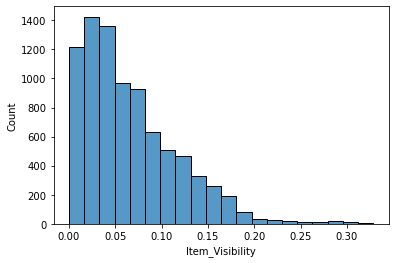

In [35]:
sns.histplot(df['Item_Visibility'], bins=20)

<AxesSubplot:xlabel='Item_Type', ylabel='Count'>

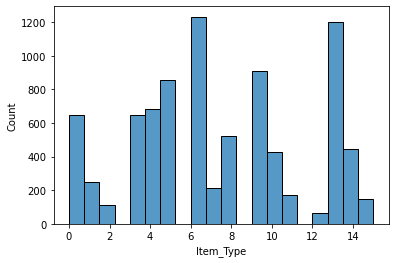

In [36]:
sns.histplot(df['Item_Type'], bins=20)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Count'>

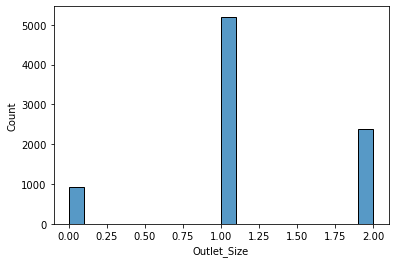

In [37]:
sns.histplot(df['Outlet_Size'], bins=20)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Count'>

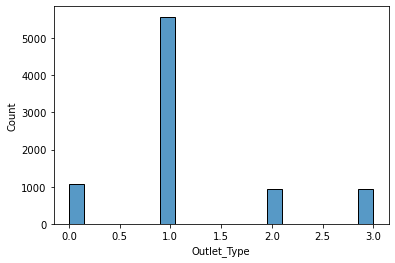

In [38]:
sns.histplot(df['Outlet_Type'], bins=20)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

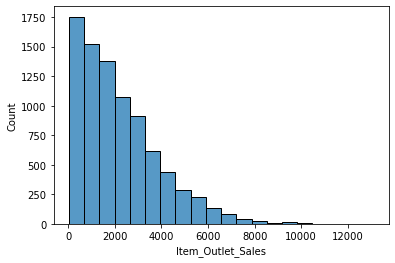

In [39]:
sns.histplot(df['Item_Outlet_Sales'], bins=20)

<AxesSubplot:xlabel='Item_Type', ylabel='Outlet_Size'>

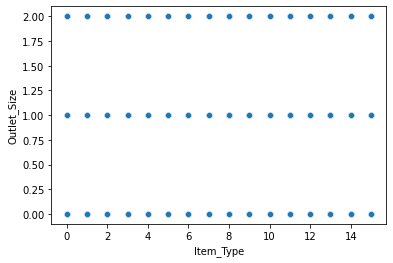

In [40]:
sns.scatterplot(x='Item_Type', y='Outlet_Size',data=df)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Outlet_Identifier'>

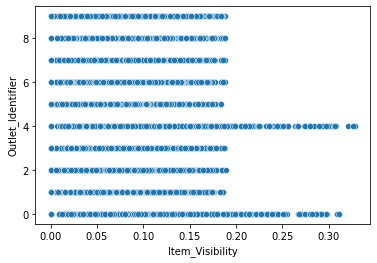

In [41]:
sns.scatterplot(x='Item_Visibility', y='Outlet_Identifier',data=df)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Type'>

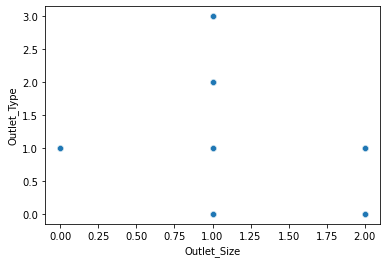

In [42]:
sns.scatterplot(x='Outlet_Size', y='Outlet_Type',data=df)

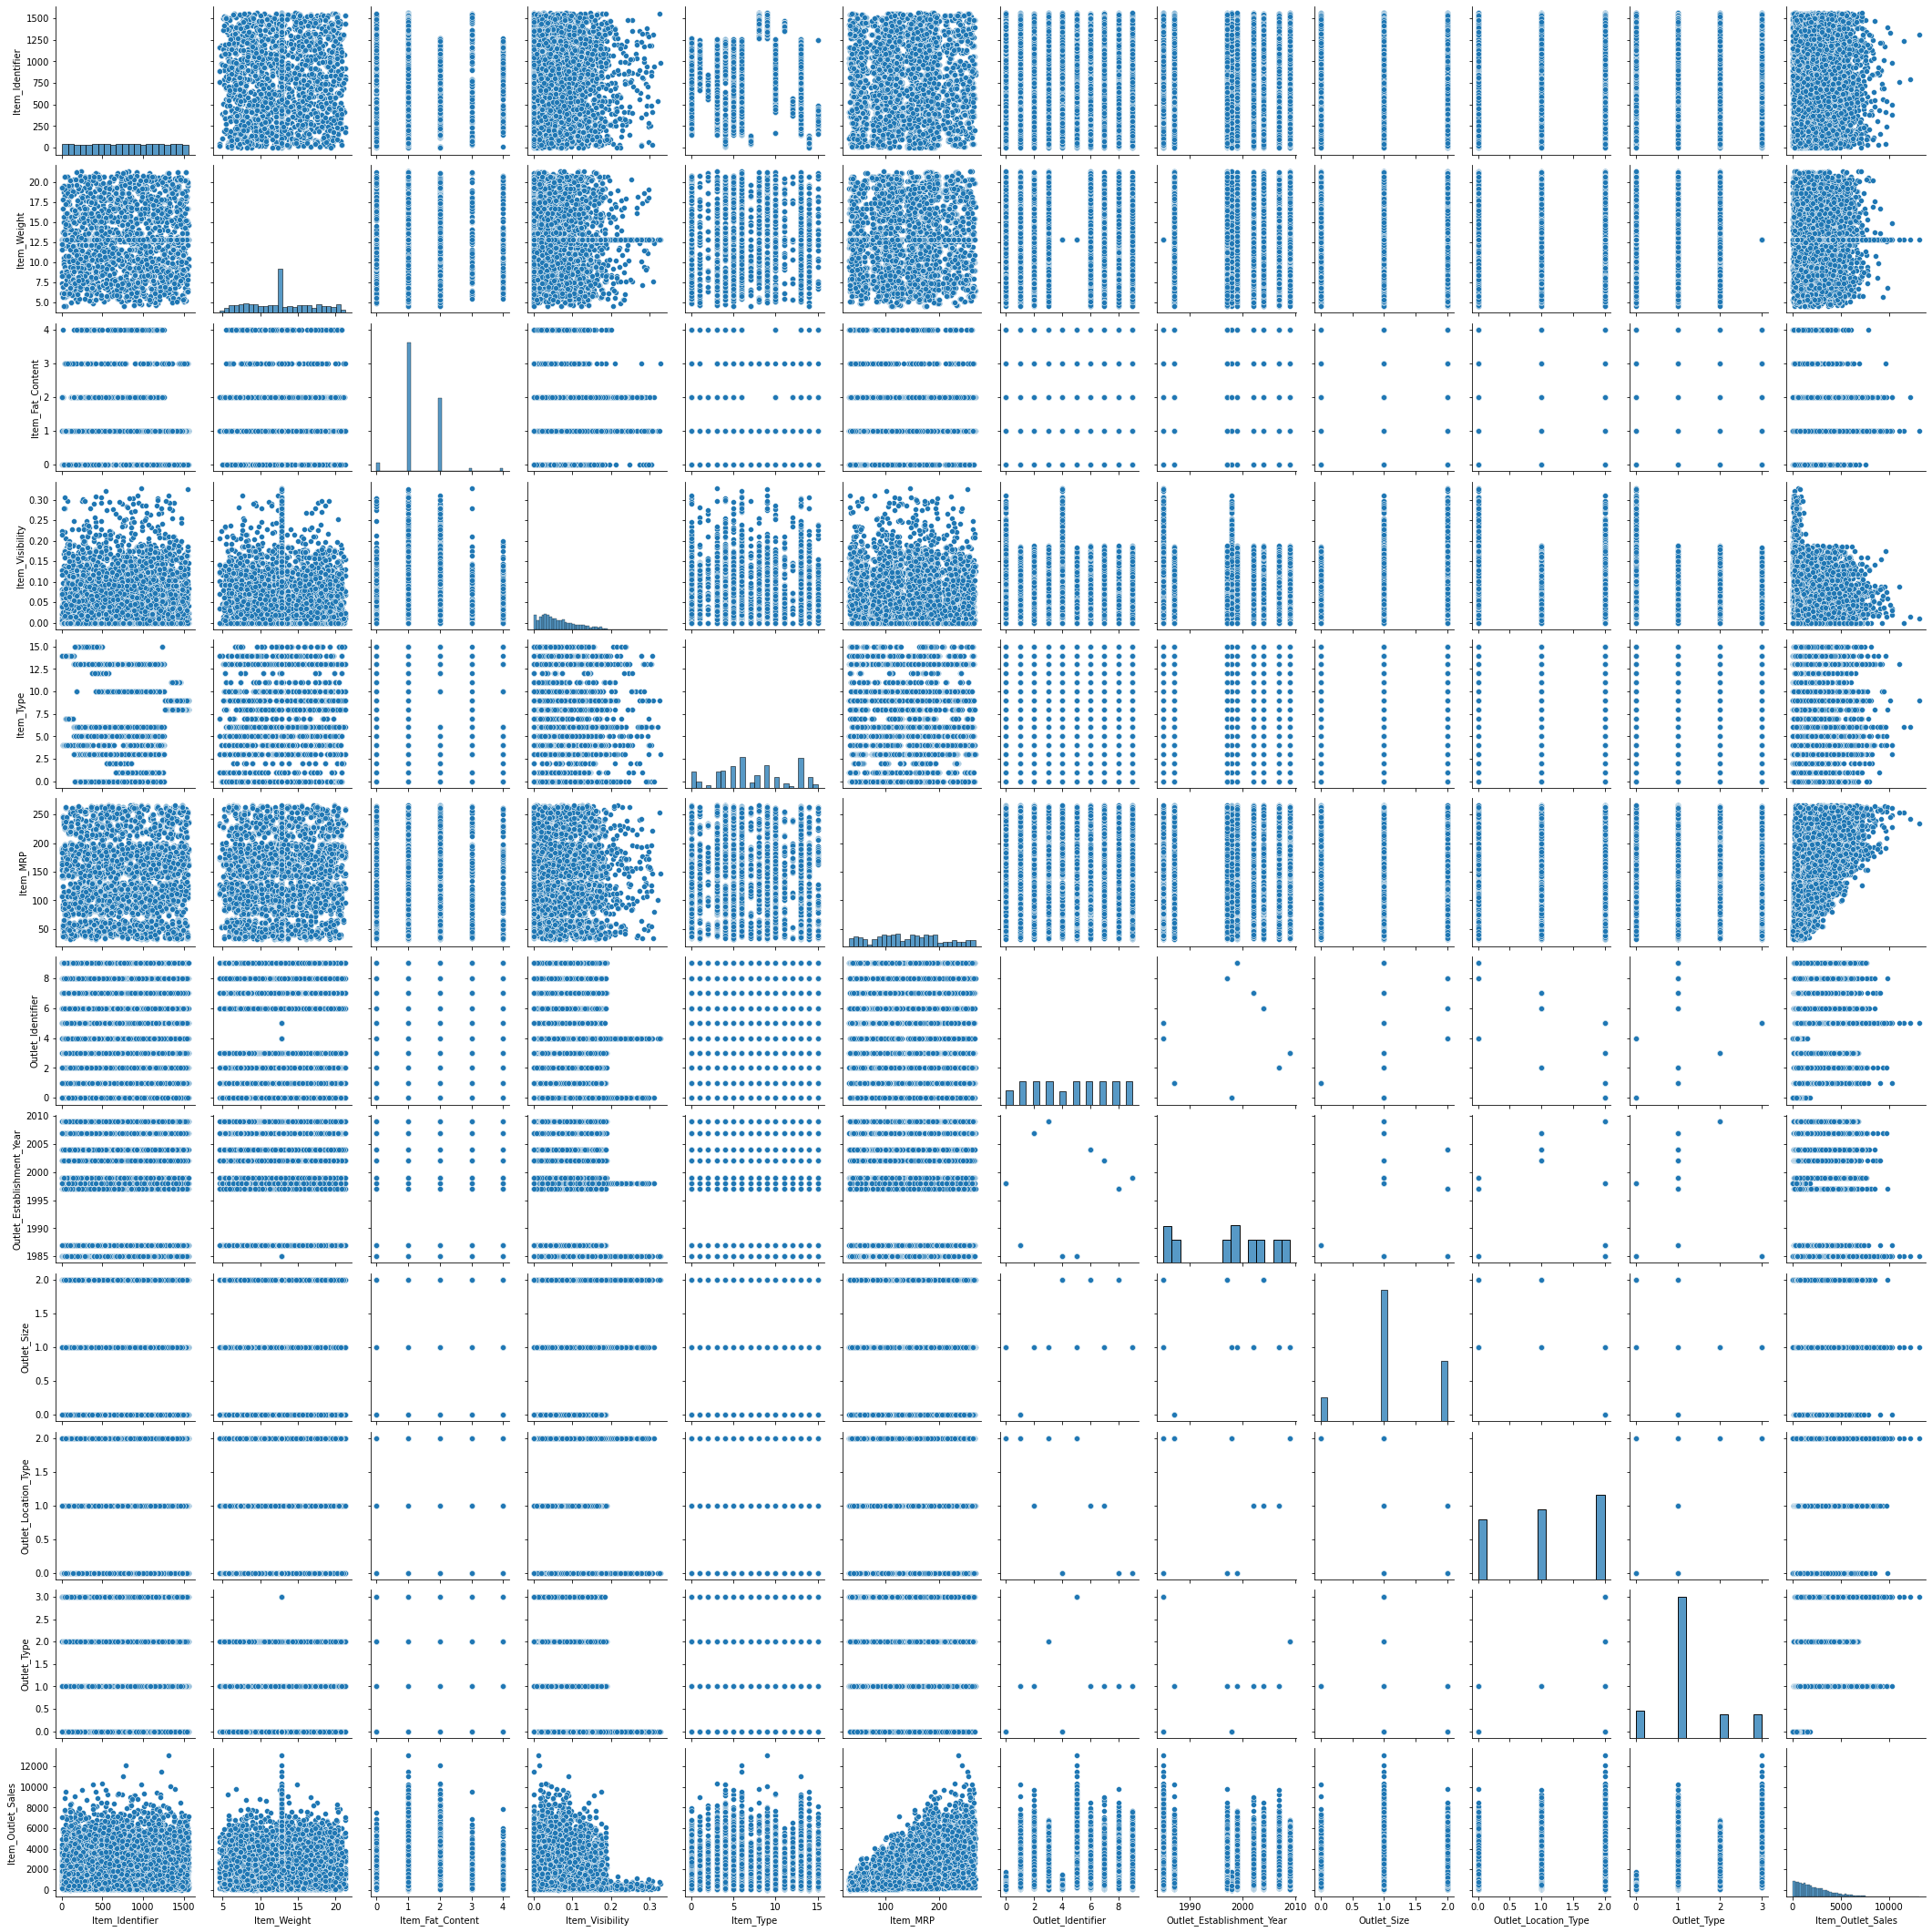

In [43]:
sns.pairplot(df)

# Skewness

In [44]:
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

# Outliers Check

<AxesSubplot:>

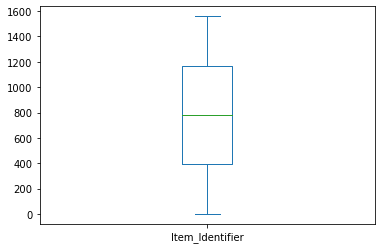

In [45]:
df['Item_Identifier'].plot.box()

No outliers are present in Item_Itendifier.

<AxesSubplot:>

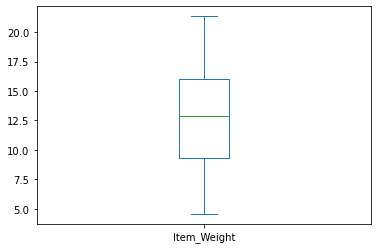

In [46]:
df['Item_Weight'].plot.box()

<AxesSubplot:>

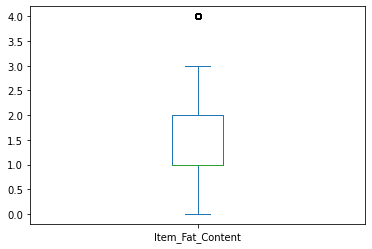

In [47]:
df['Item_Fat_Content'].plot.box()

Outliers are present in the Item_Fat_Content.

<AxesSubplot:>

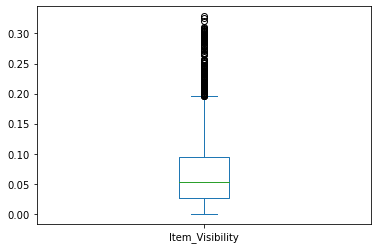

In [48]:
df['Item_Visibility'].plot.box()

Outliers are present.

<AxesSubplot:>

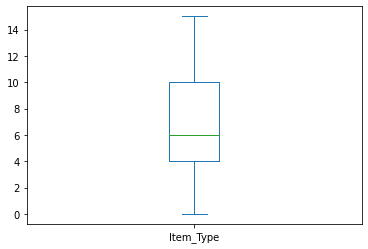

In [49]:
df['Item_Type'].plot.box()

<AxesSubplot:>

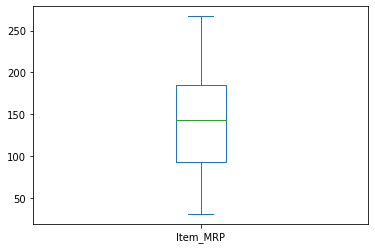

In [50]:
df['Item_MRP'].plot.box()

<AxesSubplot:>

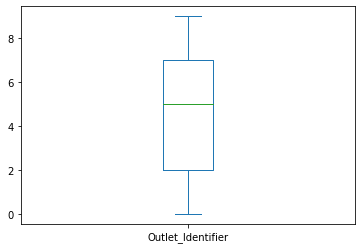

In [51]:
df['Outlet_Identifier'].plot.box()

<AxesSubplot:>

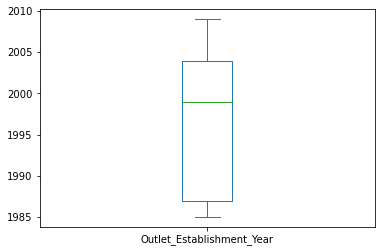

In [52]:
df['Outlet_Establishment_Year'].plot.box()

<AxesSubplot:>

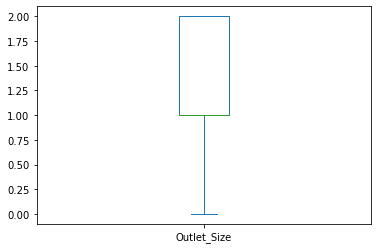

In [53]:
df['Outlet_Size'].plot.box()

<AxesSubplot:>

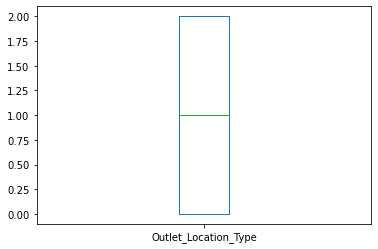

In [54]:
df['Outlet_Location_Type'].plot.box()

<AxesSubplot:>

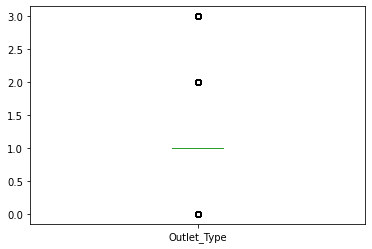

In [55]:
df['Outlet_Type'].plot.box()

<AxesSubplot:>

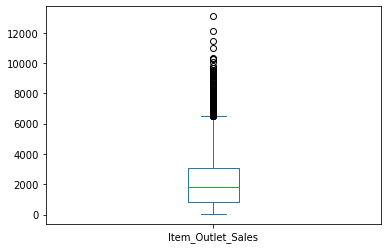

In [56]:
df['Item_Outlet_Sales'].plot.box()

# Removing Outliers

In [57]:
from scipy.stats import zscore

dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [58]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (8222, 12)


In [59]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [60]:
df.shape

(8222, 12)

Totally 301 rows are deleted.

# Correlation of the columns with target variable

In [61]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.047694,-0.100506,-0.027133,-0.014391,0.015797,-0.009863,-0.013171,0.001973,0.002105,-0.004554,0.005764
Item_Weight,0.047694,1.000000,-0.019195,-0.009853,0.027716,0.024458,-0.009720,-0.009266,-0.008281,0.005994,-0.002089,0.010351
Item_Fat_Content,-0.100506,-0.019195,1.000000,0.039216,-0.126249,0.002854,0.001118,-0.010542,-0.008840,-0.004478,0.000706,0.020618
Item_Visibility,-0.027133,-0.009853,0.039216,1.000000,-0.036583,0.001472,-0.070419,-0.044140,0.045678,-0.015106,-0.119910,-0.092554
Item_Type,-0.014391,0.027716,-0.126249,-0.036583,1.000000,0.031041,0.003481,0.007952,0.001253,-0.000275,0.000651,0.015589
Item_MRP,0.015797,0.024458,0.002854,0.001472,0.031041,1.000000,-0.001717,0.019437,0.006314,-0.004097,-0.022156,0.568176
Outlet_Identifier,-0.009863,-0.009720,0.001118,-0.070419,0.003481,-0.001717,1.000000,0.080153,0.511577,-0.723597,0.087083,0.162516
Outlet_Establishment_Year,-0.013171,-0.009266,-0.010542,-0.044140,0.007952,0.019437,0.080153,1.000000,0.207683,-0.093957,-0.120397,-0.024280
Outlet_Size,0.001973,-0.008281,-0.008840,0.045678,0.001253,0.006314,0.511577,0.207683,1.000000,-0.611339,-0.194481,-0.078753
Outlet_Location_Type,0.002105,0.005994,-0.004478,-0.015106,-0.000275,-0.004097,-0.723597,-0.093957,-0.611339,1.000000,0.467156,0.069131


<AxesSubplot:>

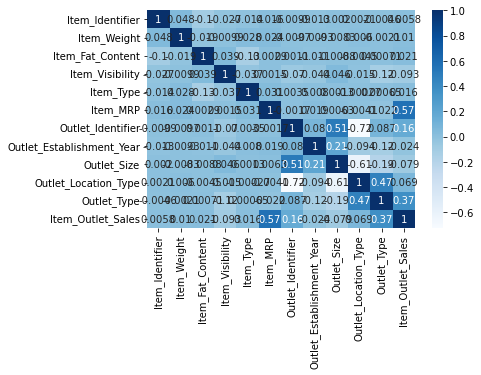

In [62]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

# Scaling Technique

In [63]:
features = df.drop(columns = ['Item_Outlet_Sales'])
features

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [64]:
target= df['Item_Outlet_Sales']
target

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8222, dtype: float64

In [65]:
features.shape

(8222, 11)

In [66]:
len(features)

8222

In [67]:
len(target)

8222

In [68]:
scale=StandardScaler()
features=scale.fit_transform(features)
features

array([[-1.38525904, -0.83758301, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.26058572],
       [-1.71298557, -1.6325653 ,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.01930425],
       [-0.26478859,  1.09107226, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.26058572],
       ...,
       [ 1.2741975 , -0.53182058, -0.58389405, ...,  1.3809534 ,
        -0.13578784, -0.26058572],
       [-0.22271559, -1.3291549 ,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.01930425],
       [-1.6199821 ,  0.45602723, -0.58389405, ...,  1.3809534 ,
        -1.37079631, -0.26058572]])

In [69]:
features.shape

(8222, 11)

In [70]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

Train the model

In [71]:
features_train.shape

(6577, 11)

In [72]:
target_train.shape

(6577,)

In [73]:
features_test.shape

(1645, 11)

In [74]:
target_test.shape

(1645,)

# Linear Regression

In [75]:
lr=LinearRegression()
lr.fit(features_train,target_train)
lr.coef_

array([ 1.16421794e+01, -1.25530770e+01,  3.09402003e+01, -5.45701090e+01,
        8.52860921e-01,  9.18092729e+02,  1.64967045e+02,  3.72892382e+01,
       -2.17287791e+02, -2.01286028e+02,  6.30411942e+02])

In [87]:
features=['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier', 'Outlet_Establishment_year', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']
list(zip(lr.coef_,features))

[(11.642179369770279, 'Item_Identifier'),
 (-12.553076975673985, 'Item_Weight'),
 (30.940200340959464, 'Item_Fat_Content'),
 (-54.570109014742044, 'Item_Visibility'),
 (0.85286092127139, 'Item_Type'),
 (918.09272870755, 'Item_MRP'),
 (164.96704537064454, 'Outlet_Identifier'),
 (37.289238173992786, 'Outlet_Establishment_year'),
 (-217.28779081977402, 'Outlet_Size'),
 (-201.2860276233336, 'Outlet_Location_Type'),
 (630.41194196896, 'Outlet_Type')]

In [88]:
cfdf=pd.DataFrame(data=lr.coef_,index=features)
cfdf

,0
Item_Identifier,11.642179
Item_Weight,-12.553077
Item_Fat_Content,30.940200
Item_Visibility,-54.570109
Item_Type,0.852861
Item_MRP,918.092729
Outlet_Identifier,164.967045
Outlet_Establishment_year,37.289238
Outlet_Size,-217.287791
Outlet_Location_Type,-201.286028


In [89]:
lr.intercept_

2142.8821123300386

In [90]:
lr.score(features_train,target_train)

0.49775318140586655

In [91]:
pred=lr.predict(features_test)
pred

array([ 734.43990608, 1965.91938036, 2921.37362808, ..., 2600.5657435 ,
       2366.88448451,  435.94941039])

In [92]:
print("Predicted values", pred)

Predicted values [ 734.43990608 1965.91938036 2921.37362808 ... 2600.5657435  2366.88448451
  435.94941039]


In [94]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,734.439906
1,1965.919380
2,2921.373628
3,456.440085
4,2324.428408
...,...
1640,1595.699615
1641,3228.764345
1642,2600.565744
1643,2366.884485


In [95]:
lr.score(features_test,target_test)

0.5027822874745722

In [96]:
print("Mean absolute error:", mean_absolute_error(target_test,pred))
print("Mean squared error:", mean_squared_error(target_test,pred))
print("Root mean square:", np.sqrt(mean_squared_error(target_test,pred)))

Mean absolute error: 854.1844786071663
Mean squared error: 1223454.9014755173
Root mean square: 1106.0989564571144


In [97]:
print("R2 Score:", r2_score(target_test,pred))

R2 Score: 0.5027822874745722


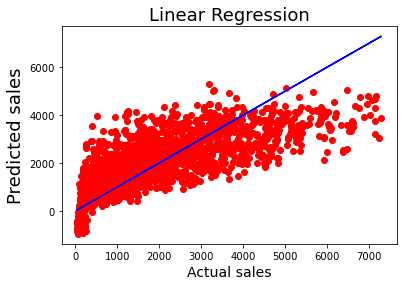

In [103]:
plt.scatter(x=target_test, y=pred, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Linear Regression', fontsize=18)
plt.savefig('lr.png')
plt.show()

In [124]:
# Cross Validation


from sklearn.model_selection import cross_val_score

score=cross_val_score(lr,features,target,cv=5)
print(score)
print(score.mean())
print(score.std())

ValueError: Found input variables with inconsistent numbers of samples: [11, 8222]

# Regularization

In [104]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.metrics import r2_score

In [105]:
rdg=Ridge(alpha=.0001,random_state=45)
rdg.fit(features_train,target_train)
rdg.score(features_train,target_train)

0.4977531814058662

In [106]:
rdg.coef_

array([ 1.16421793e+01, -1.25530767e+01,  3.09402004e+01, -5.45701099e+01,
        8.52861234e-01,  9.18092714e+02,  1.64967069e+02,  3.72892338e+01,
       -2.17287780e+02, -2.01285987e+02,  6.30411912e+02])

In [107]:
cfdf=pd.DataFrame(data=lr.coef_,index=features)
cfdf

,0
Item_Identifier,11.642179
Item_Weight,-12.553077
Item_Fat_Content,30.940200
Item_Visibility,-54.570109
Item_Type,0.852861
Item_MRP,918.092729
Outlet_Identifier,164.967045
Outlet_Establishment_year,37.289238
Outlet_Size,-217.287791
Outlet_Location_Type,-201.286028


In [108]:
predict=rdg.predict(features_test)

In [109]:
r2_score(target_test,predict)

0.5027822878461565

In [110]:
lso=Lasso(alpha=.0001,random_state=47)
lso.fit(features_train,target_train)
lso.score(features_train,target_train)

0.4977531814057917

In [111]:
predict1=lso.predict(features_test)

In [112]:
r2_score(target_test,predict1)

0.5027823068078461

# Approaching more Regressors

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

Decision Tree Regression

In [114]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(features_train,target_train)
print('dtc score of DTR:', dtr.score(features_train, target_train))

dtrpredict=dtr.predict(features_test)
print('dtc r2_score:', r2_score(target_test,dtrpredict))

print("Mean absolute error:", mean_absolute_error(target_test,dtrpredict))
print("Mean squared error of dtc = ", mean_squared_error(target_test, dtrpredict))
print("Root Mean Squared error of dtc=", np.sqrt(mean_squared_error(target_test,dtrpredict)))

dtc score of DTR: 1.0
dtc r2_score: 0.11579023784852205
Mean absolute error: 1053.849691306991
Mean squared error of dtc =  2175688.315571429
Root Mean Squared error of dtc= 1475.0214627494167


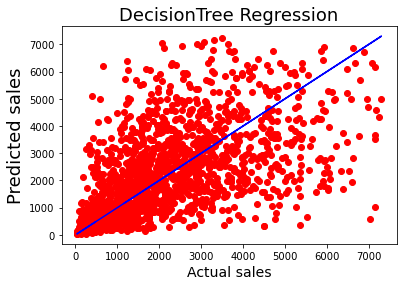

In [115]:
plt.scatter(x=target_test, y=dtrpredict, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('DecisionTree Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

KNeighbour Regression

In [116]:
knr=KNeighborsRegressor()
knr.fit(features_train,target_train)
print('dtc score of KNR:', dtr.score(features_train, target_train))

knrpredict=knr.predict(features_test)
print('dtc r2_score:', r2_score(target_test,knrpredict))

print("Mean absolute error:", mean_absolute_error(target_test,knrpredict))
print("Mean squared error of dtc = ", mean_squared_error(target_test, knrpredict))
print("Root Mean Squared error of dtc=", np.sqrt(mean_squared_error(target_test,knrpredict)))

dtc score of KNR: 1.0
dtc r2_score: 0.5145281350786657
Mean absolute error: 799.6624695927052
Mean squared error of dtc =  1194553.0452841457
Root Mean Squared error of dtc= 1092.9561040060785


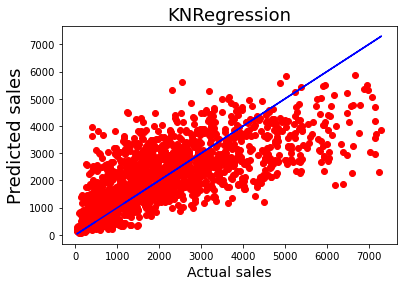

In [117]:
plt.scatter(x=target_test, y=knrpredict, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('KNRegression', fontsize=18)
plt.savefig('knr.png')
plt.show()

SupportVector Regression

In [118]:
svr1=SVR()
svr1.fit(features_train,target_train)
print('dtc score of SVR:', dtr.score(features_train, target_train))

svr1predict=svr1.predict(features_test)
print('dtc r2_score:', r2_score(target_test,svr1predict))

print("Mean absolute error:", mean_absolute_error(target_test,svr1predict))
print("Mean squared error of dtc = ", mean_squared_error(target_test, svr1predict))
print("Root Mean Squared error of dtc=", np.sqrt(mean_squared_error(target_test,svr1predict)))

dtc score of SVR: 1.0
dtc r2_score: 0.05666546521073845
Mean absolute error: 1164.5319751660152
Mean squared error of dtc =  2321170.8498015883
Root Mean Squared error of dtc= 1523.5389229690156


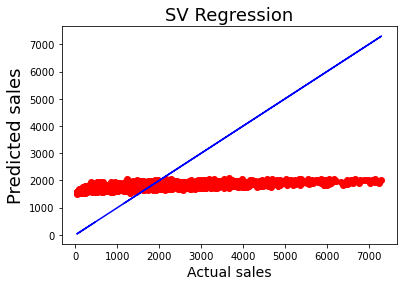

In [119]:
plt.scatter(x=target_test, y=svr1predict, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('SV Regression', fontsize=18)
plt.savefig('svr1.png')
plt.show()

# Ensemble Technique